In [8]:
######------Group-5-----########
################################----Fahad Molla 18-37548-1-----################################


import os                                               #os -> for interecting with the operating system
import numpy as np                                      #numpy -> for using numpy array
import matplotlib.pyplot as plt                         #
from sklearn.model_selection import train_test_split    #Importing train & test dataset from the main dataset

import cv2                                              #cv2 -> from opencv cv2 was imported


data_dir= r'C:\Users\Foysal\Desktop\animals2'           #data-dir -> folder path added through data_dir

categories = ['Cheetah','Hyena','Tiger']                #categories -> using for accessing sub folders

data = []                                               #data[] -> taking a empty array for storing data


for category in categories:                              
    path=os.path.join(data_dir, category)               #path = os.path.join(data_dir, category)-> use for joining data_dir and category
    label=categories.index(category)                    #label = categories.index(category)-> find the index of the category folder item

    for img_name in os.listdir(path):
        #print(img_name)
        image_path = os.path.join(path, img_name)       #image_path -> using for join the path and the list of directory 
        image =cv2.imread(image_path)                   #image -> for read the images

        try:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   #converting the images BGR to RGB as open cv reades BGR format images.
            image= cv2.resize(image,(224,224))               #resizing the image to (224,224)
            image = np.array(image,dtype =np.float32)        #images converted to np array and the datatype is float32
                #print(image)
            data.append([image,label])                       #leveling the images
               
        except Exception as e:
            pass
    



print(len(data))                                             #printing the number of images



################################----NUSRAT SONGITA KHAN 18-37518-1-----################################



def load_data():
    

    np.random.shuffle(data)                                   #np.random.shuffle(data) -> using for shuffle all data 
    feature = []
    labels =[]

    for img,label in data:
        feature.append(img)                                   #feature.append(img) -> append images to the feature array                                   
        labels.append(label)                                  #labels.append(label) -> append labels to the label array
    feature=np.array(feature,dtype=np.float32)
    labels=np.array(labels)
    feature = feature/255.0                                   #Normalizing the features

    return [feature, labels]

3000


In [18]:
###################---------ADIT AHNAF KHAN 18-37491-1---------###################



import tensorflow as tf                 #importing tesnsorflow
(feature, labels) = load_data()         #Load_data returns the features and levels


#Using the train_test_split we are spliting the fratures and labels where we kept the test_size 0.1(300 out of 3000)
x_train, x_test, y_train, y_test = train_test_split(feature,labels, test_size = 0.1)  


input_layer = tf.keras.layers.Input([224,224,3])

#Conv2d- Applies a 2D convolution over the input signal.
#Filters is used for the number of output filters in the convolution.
#krnel_size is used for specifying the height and width of the 2D convolution window
#padding = same, is used here for getting the output such that it has the  same height/width dimension as the input and activation = relu is used, so that it will output the input directly if it is positive otherwise, it will output zero.
#Maxpolling()-It represent the input by taking the max value over the window define by the argument pool_size for each dimension. strides argument is used to specifies how far the pooling window moves for each polling step,if none it will default to pool_size.
conv1 = tf.keras.layers.Conv2D(filters = 32, kernel_size=(5,5),padding='Same', activation = 'relu')(input_layer)


#Input representation by taking the max value over the window, define by pool size for each dimention along the features axis and pass the value into conv1
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)


conv2 = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3),padding='Same', activation = 'relu')(pool1)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv2)

conv3 = tf.keras.layers.Conv2D(filters = 96, kernel_size=(3,3),padding='Same', activation = 'relu')(pool2)

pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv3)

conv4 = tf.keras.layers.Conv2D(filters = 96, kernel_size=(3,3),padding='Same', activation = 'relu')(pool3)

pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv4)




##################--------------------Md. Abu Zehad Foysal 18-37514-1 ---------------##################




#Using for flatten the input, after using the flatten function the (batch_size,22) will be (batch_size,4) 
flt1 = tf.keras.layers.Flatten()(pool4)

#Here,Dense computes the dot product between the inputs and the kernel with the last axis of the inputs.
#Relu: used for giving the output based on the input(Positive).Otherwise it will show zero.
dn1 = tf.keras.layers.Dense(512,activation='relu')(flt1)

#here softmax is used for showing output for one value for each node in the output layer.
out = tf.keras.layers.Dense(5,activation='softmax')(dn1)

#Here,Model groups layers into an object with training and inference features.
model = tf.keras.Model(input_layer, out)

# Compile() is used to compile  model for predicting, it set the loss, optimizer and the metrics function.
# Adam combines the best properties of the algorithms to provide an optimization algorithm.
# Metric function is used to judge the performance of model.
# Loss function compute the quantity that a model should seek to minimize during training

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#here, we are trainig the model for 5times(epochs)
#Fit matrices is converted into array.
history=model.fit(x_train,y_train,batch_size = 100,epochs =5)

#Saving the trained model
model.save('mymodel.h5')


Epoch 1/5
27/27 [==============================] - 70s 3s/step - loss: 1.1804 - accuracy: 0.3867
Epoch 2/5
27/27 [==============================] - 69s 3s/step - loss: 0.8459 - accuracy: 0.6304
Epoch 3/5
27/27 [==============================] - 68s 3s/step - loss: 0.6666 - accuracy: 0.7304
Epoch 4/5
27/27 [==============================] - 72s 3s/step - loss: 0.5116 - accuracy: 0.8015
Epoch 5/5
27/27 [==============================] - 69s 3s/step - loss: 0.4402 - accuracy: 0.8300


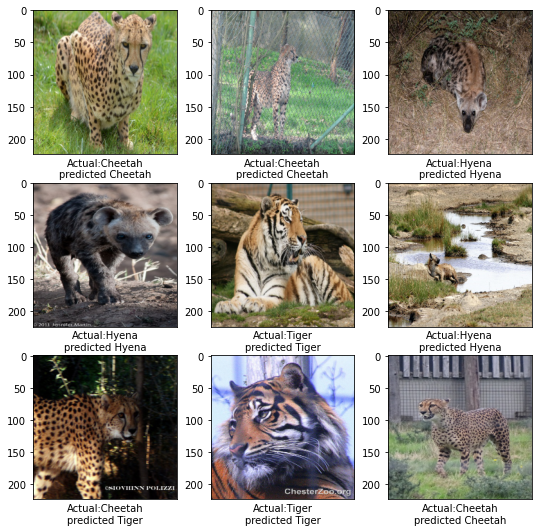

In [20]:
################################----NUSRAT SONGITA KHAN 18-37518-1-----################################




prediction = model.predict(x_test)      #Return  the predicted result between 0 & 1 which is stored in prediction variable
plt.figure(figsize=(9,9))               #Ploting 9*9 sized images in the output    

for i in range(9):                      #showing 9 test images using loop
    plt.subplot(3,3,i+1)                #Plot images 3*3 in Grid 
    plt.imshow(x_test[i])               #Showing the images
    plt.xlabel('Actual:'+categories[y_test[i]]+'\n'+'predicted '+categories[np.argmax(prediction[i])]) #Giving labels of the images
    plt.xticks([])
plt.show()                              #Showing the output images

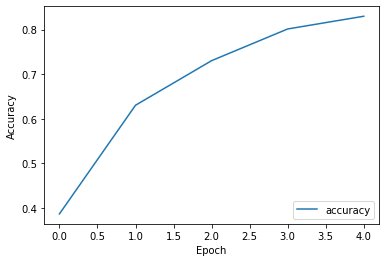

In [21]:



plt.plot(history.history['accuracy'], label='accuracy')   

#Defining x & y labels of the graph.
plt.xlabel('Epoch')      
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
